<a href="https://colab.research.google.com/github/jangvu/Project_by_me/blob/main/%08sentiment_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import re
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/Data/IMDB_reviews'

aclImdb_v1.tar.gz  archive.zip


In [4]:
!unzip -q "/content/drive/MyDrive/Data/IMDB_reviews/archive.zip"

In [88]:
df = pd.read_csv('/content/IMDB Dataset.csv')

In [89]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


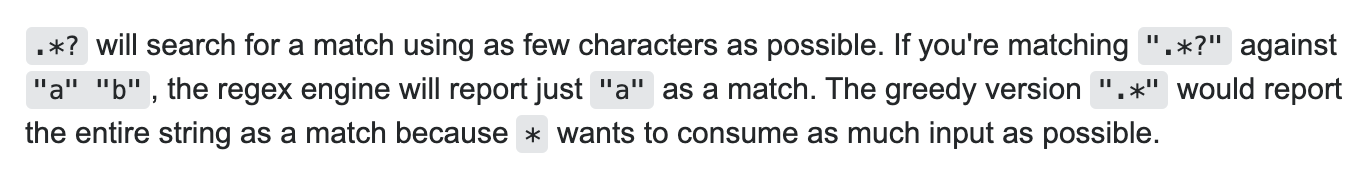

#Pre-processing data

https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0

The **re.sub()** function is used to **replace** **occurrences of a particular sub-string** **with another sub-string**.

This function takes as input the following:

1. The sub-string to replace
2. The sub-string to replace with
3. The actual string

match = re.sub("\s","!!!",string) => repalce "\s" with !!!

https://www.educative.io/edpresso/how-to-use-regex-in-python

In [165]:
def remove_html_tags(text):
  cleaner = re.compile('<.*?>')
  cleantext = re.sub(cleaner, ' ', text)
  return cleantext

def remove_between_square_brackets(text):
  return re.sub('\[[^]]*\]', '', text)

def remove_special_characters(text, remove_digits=True):
  pattern=r'[^a-zA-z0-9\s]'
  text=re.sub(pattern,'',text)
  text=re.sub("\s\s+" , " ", text)
  text=text.lower()
  return text

def truncating_review(text):
  text = text[:300]
  return text


def preprocess_review(text):
  clean_text = remove_html_tags(text);
  clean_text = remove_between_square_brackets(clean_text);
  clean_text = remove_special_characters(clean_text)
  clean_text = truncating_review(clean_text)
  return clean_text;

In [91]:
df['review'] = df["review"].apply(lambda x: preprocess_review(x))

In [92]:
df.head(5)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [93]:
df['new_sentiment'] = df['sentiment'] == "positive"
df["new_sentiment"] = df["new_sentiment"].astype("uint8")
df = df.drop("sentiment", axis=1)
df = df.rename(columns={"new_sentiment": "sentiment"})

In [94]:
df.head(5)

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


# Splitting data

In [95]:
X = df[:5000]['review']
y = df[:5000]['sentiment']

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [97]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [98]:
count = 0
for i in train_dataset:
  print(i)
  count +=1
  if count == 5:
    break

(<tf.Tensor: shape=(), dtype=string, numpy=b'this stinker is in mystifyingly frequent rotation on one channel here and ive found myself watching in horror again and again the script is like something one would come up with friends over several too many drinks and the production values match admirably its meant to be a childrens movie but featu'>, <tf.Tensor: shape=(), dtype=uint8, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'how often do you see a film of any kind that has a talent show with refreshments waldos last stand is a refreshment here waldo is selling lemonade but isnt making any money alfalfa spanky darla mickey and buckwheat come to visit him which is ironic because in both 3 men in a tub and came the brawn w'>, <tf.Tensor: shape=(), dtype=uint8, numpy=1>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'if you want just about everything you want to know about wwii from multiple perspectives this dvd delivers you will learn new things guaranteed so much so that you won

In [99]:
for example, label in train_dataset.take(1):
    print('text: ', example.numpy())
    print('label: ', label.numpy())

text:  b'this stinker is in mystifyingly frequent rotation on one channel here and ive found myself watching in horror again and again the script is like something one would come up with friends over several too many drinks and the production values match admirably its meant to be a childrens movie but featu'
label:  0


In [100]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(5000).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(500)

In [55]:
count = 0
for i in train_dataset:
  print(i)
  count +=1
  if count == 5:
    break

(<tf.Tensor: shape=(32,), dtype=string, numpy=
array([b'in short if you want to watch burt reynolds best films than this one must be included if you dont like burt you may still like this if you love burt this may become one of your favorite movies of all time being from atlanta it does hit home but its also nice to see a copactiondrama that takes place ',
       b'this movie changed my life hogans performance was nothing short of incredible and i still havent recovered from his exclusion from the 1990 oscar nominations and as brightly as the hulkster shines in this movie you cant discount the brilliant writing and direction that vaults this masterpiece in to ',
       b'i dont know anything of the writers or the directors earlier work so i hadnt brought any prejudices to the film based on the brief description of the plot in tv guide i thought it might be interesting but implausibility was piled upon implausibility each turn of the plot seemed to be an excuse to dr',
       b'this mov

In [56]:
for x,y in train_dataset:
  print(x)

tf.Tensor(
[b'it is very hard to come up with new information about jfk jr and this fine movie had very little of it but it was a joy to watch the casting was very good and the script while somewhat like a documentary was also good my only complaint was that it wasnt long enough perhaps a twopart movie could have'
 b'well i fear that my review of this special wont heed much different observation than the others before me but i literally just watched it during a pbs membership drive and frankly im too excited not to say anything to really appreciate the enigma that is barbra streisand you have to look back before'
 b'this has to be by far the absolute worst movie i have seen in the last 20 years when i saw that michael madsen was in it i figured it couldnt be too bad a movie since he has been in some pretty decent films and he was a pretty fair actor wrong no one should waste their time on this film i fast forwa'
 b'this movie is not in anyway funny it tries to be funny with its lame hu

**Using TextVectorization**

In [57]:
VOCAB_SIZE=2000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [58]:
vocab = np.array(encoder.get_vocabulary())
print('First 50 words in vocab: ' + str(vocab[:50]))
print('Size of vocab: ' + str(len(vocab)))

First 50 words in vocab: ['' '[UNK]' 'the' 'a' 'and' 'of' 'i' 'to' 'is' 'this' 'it' 'in' 'was'
 'movie' 'that' 'film' 'as' 'with' 'but' 'for' 'on' 'have' 'one' 'not'
 'you' 'its' 'be' 'are' 'an' 'so' 'at' 'about' 'all' 'his' 'by' 'from'
 'my' 'like' 'who' 'has' 'just' 'very' 'he' 'good' 'what' 'when' 'they'
 'out' 'some' 'story']
Size of vocab: 2000


In [59]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=128,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True)

In [ ]:
history = model.fit(train_dataset, epochs=10, callbacks=[early_stop, model_checkpoint_callback])


Epoch 1/10
125/125 [==============================] - 38s 308ms/step - loss: 0.6612 - accuracy: 0.6200
Epoch 2/10
125/125 [==============================] - 37s 294ms/step - loss: 0.5021 - accuracy: 0.7660
Epoch 3/10
125/125 [==============================] - 37s 293ms/step - loss: 0.4040 - accuracy: 0.8217
Epoch 4/10
125/125 [==============================] - 37s 293ms/step - loss: 0.3364 - accuracy: 0.8658
Epoch 5/10
125/125 [==============================] - 37s 297ms/step - loss: 0.2929 - accuracy: 0.8888
Epoch 6/10
125/125 [==============================] - 37s 296ms/step - loss: 0.2542 - accuracy: 0.9068
Epoch 7/10
125/125 [==============================] - 37s 294ms/step - loss: 0.2183 - accuracy: 0.9215
Epoch 8/10
125/125 [==============================] - 37s 294ms/step - loss: 0.1792 - accuracy: 0.9358
Epoch 9/10
125/125 [==============================] - 37s 295ms/step - loss: 0.1451 - accuracy: 0.9505
Epoch 10/10
125/125 [==============================] - 37s 295ms/step - l

In [ ]:
examples = [
  "The movie was great, i would recommend this movie to my family, the storyline is amazing",
  "The movie was meh, not great not terrible, but there is something off in the plot, but still this movie have great CGI effect",
  "The movie was terrible, dont watch this movie, dont waste your time watching these movies!"
]

model.predict(examples)

array([[0.8326335 ],
       [0.35920668],
       [0.06389627]], dtype=float32)

**Using Custom**

In [135]:
df = pd.read_csv('/content/IMDB Dataset.csv')


In [136]:
df['review'] = df["review"].apply(lambda x: preprocess_review(x))
df['new_sentiment'] = df['sentiment'] == "positive"
df["new_sentiment"] = df["new_sentiment"].astype("uint8")
df = df.drop("sentiment", axis=1)
df = df.rename(columns={"new_sentiment": "sentiment"})

In [139]:
X = df[:5000]['review']
y = df[:5000]['sentiment']
type(X[0])

str

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
type(X_train)

pandas.core.series.Series

In [146]:
for X_batch, y_batch in train_dataset.take(1):
  print(X_batch)

tf.Tensor(b'this stinker is in mystifyingly frequent rotation on one channel here and ive found myself watching in horror again and again the script is like something one would come up with friends over several too many drinks and the production values match admirably its meant to be a childrens movie but featu', shape=(), dtype=string)


In [147]:
from collections import Counter
vocabulary = Counter()
for X_batch, y_batch in train_dataset:
  review = tf.strings.split(X_batch)
  vocabulary.update(list(review.numpy()))
    
#Splitting the X_batch into words by ' ' adn Counter will count each word

In [148]:
a = vocabulary.most_common()[:3]
print('Most common words in reviews: ' + str(a))
print(len(vocabulary))
# Splitting the sentence into words
#X_test = tf.strings.split(X_batch)

Most common words in reviews: [(b'the', 12160), (b'a', 6854), (b'and', 5865)]
19714


In [144]:
vocab_size = 10000
truncated_vocabulary = [word for word, count in vocabulary.most_common()[:vocab_size]]

In [65]:
word_to_id = {word: index for index, word in enumerate(truncated_vocabulary)}
for word in b"This movie was faaaaaantastic".split():
    print('id of word: ' + str(word_to_id.get(word)))
    print('vocab_size: ' + str(vocab_size))

id of word: None
vocab_size: 10000
id of word: 11
vocab_size: 10000
id of word: 10
vocab_size: 10000
id of word: None
vocab_size: 10000


**Word-Embedding Demo**

In [25]:
vocab = ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"] 
indices = tf.range(len(vocab), dtype=tf.int64)
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)
num_oov_buckets = 2
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets)

categories = tf.constant(["NEAR BAY", "DESERT", "INLAND", "INLAND"])
cat_indices = table.lookup(categories)
print('Index of categories: ' + str(cat_indices))

cat_one_hot = tf.one_hot(cat_indices, depth=len(vocab) + num_oov_buckets)
print('One hot coding of categories: ' + str(cat_one_hot))

Index of categories: tf.Tensor([3 5 1 1], shape=(4,), dtype=int64)
One hot coding of categories: tf.Tensor(
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]], shape=(4, 7), dtype=float32)


**###############################################**

In [33]:
words = tf.constant(truncated_vocabulary)
word_ids = tf.range(len(truncated_vocabulary), dtype=tf.int64)
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 1000
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

In [34]:
table.lookup(tf.constant([b"This movie was faaaaaantastic".split()]))

<tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[10745,    11,    10, 10053]])>

In [170]:
def encode_words(X_batch, y_batch = 0, test = False):
  if test == False:
    return table.lookup(X_batch), y_batch
  else:
    return table.lookup(X_batch)
def split_word(X_batch, y_batch = 0, test = False):
  if test == False:
    X_batch = tf.strings.split(X_batch)
    return X_batch.to_tensor(), y_batch
  else:
    X_batch = tf.strings.split(X_batch)
    return X_batch.to_tensor()






In [157]:
train_set = train_dataset.batch(32).map(split_word)
train_set = train_set.map(encode_words).prefetch(1)

**Fail to use tensor in case of list** -> keep the array as an string not a list of strings -> dont using split in the preprocess

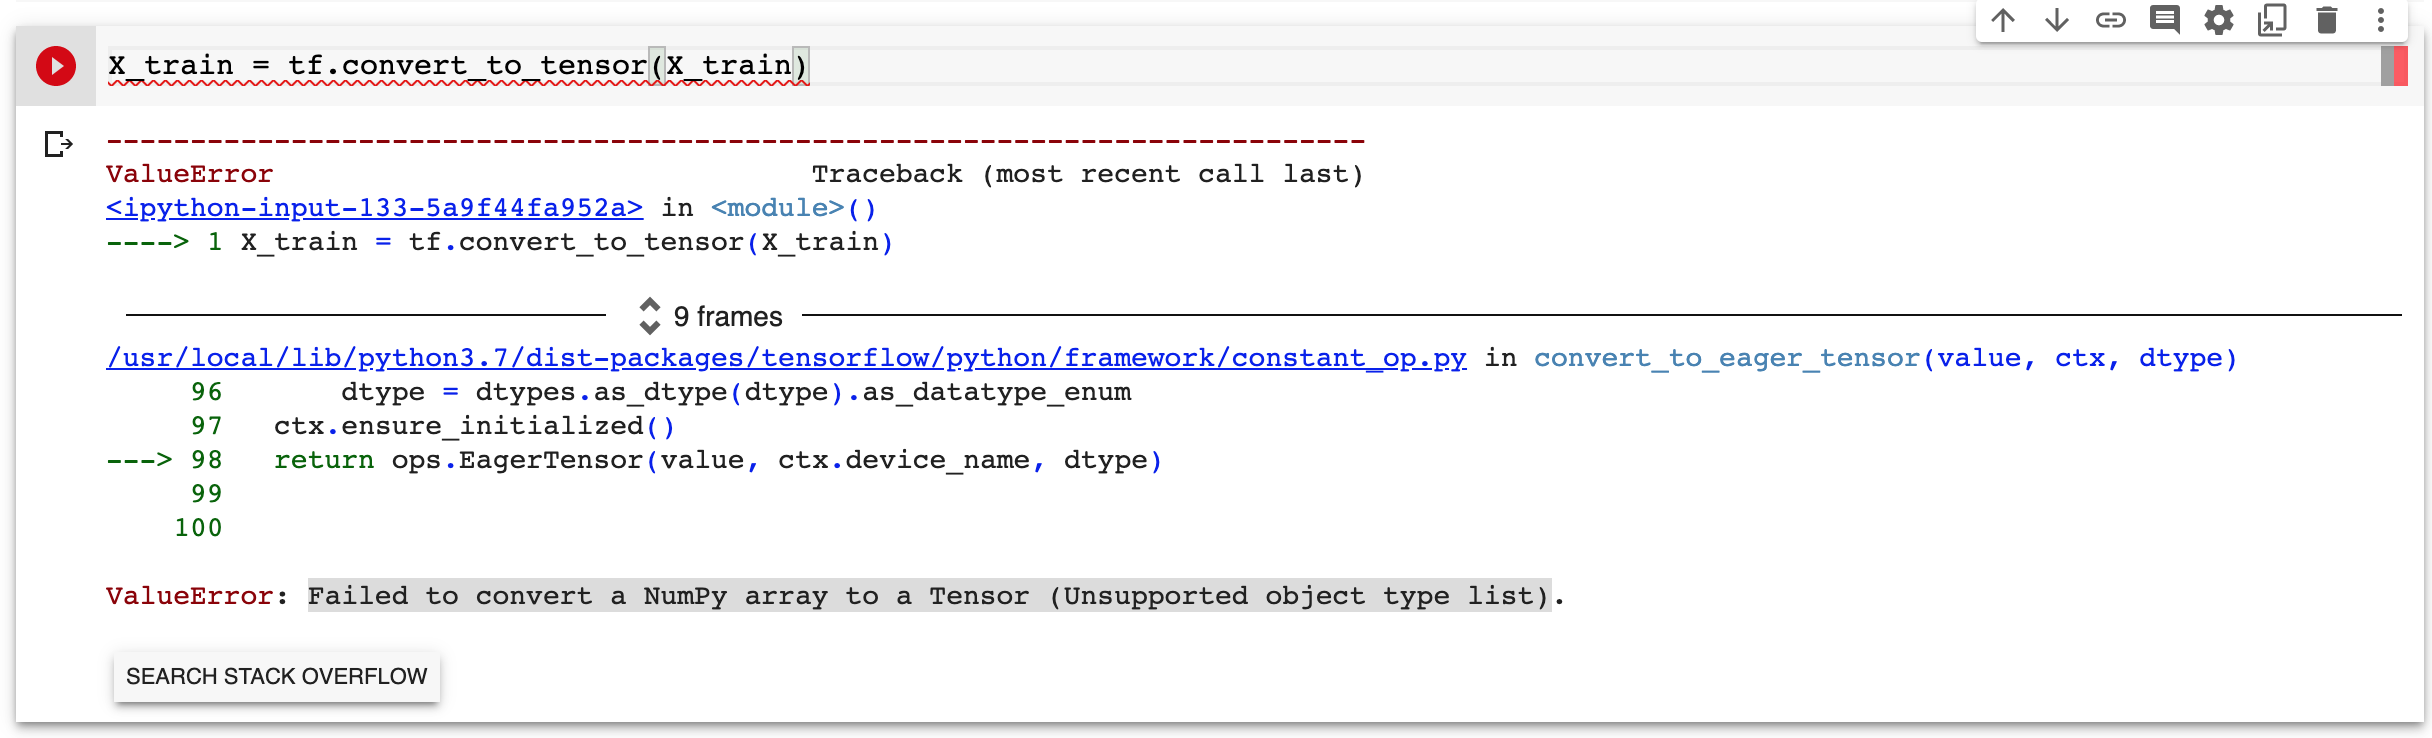

In [158]:
for X_batch, y_batch in train_set.take(1):
  print(X_batch)

tf.Tensor(
[[    7  2993     6 ... 10263 10263 10263]
 [   82   346    99 ... 10263 10263 10263]
 [   48    22   216 ... 10263 10263 10263]
 ...
 [    4    19     1 ... 10263 10263 10263]
 [    7    13    10 ... 10263 10263 10263]
 [    4    10  3243 ... 10263 10263 10263]], shape=(32, 65), dtype=int64)


In [159]:
embed_size = 128
model = keras.models.Sequential([
keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size, input_shape=[None]),
keras.layers.GRU(128, return_sequences=True), keras.layers.GRU(128),
keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"]) 
history = model.fit(train_set, epochs=5)


Epoch 1/5
125/125 [==============================] - 22s 145ms/step - loss: 0.6940 - accuracy: 0.4993
Epoch 2/5
125/125 [==============================] - 18s 144ms/step - loss: 0.6861 - accuracy: 0.5744
Epoch 3/5
125/125 [==============================] - 18s 143ms/step - loss: 0.4337 - accuracy: 0.7950
Epoch 4/5
125/125 [==============================] - 18s 144ms/step - loss: 0.1928 - accuracy: 0.9304
Epoch 5/5
125/125 [==============================] - 18s 144ms/step - loss: 0.1079 - accuracy: 0.9620


In [174]:
examples = [
  "The movie was great, i would recommend this movie to my family, the storyline is amazing",
  "The movie was meh, not great not terrible, but there is something off in the plot, but still this movie have great CGI effect",
  "The movie was terrible, dont watch this movie, dont waste your time watching these movies!"
]
type(examples)

list

In [175]:
test = []
for i in examples:
  test.append(preprocess_review(i))

In [171]:
test = tf.convert_to_tensor(test)

In [176]:
test = split_word(test, test= True)

In [177]:
test = encode_words(test, test = True)

In [178]:
model.predict(test)

array([[0.91795844],
       [0.03545809],
       [0.002455  ]], dtype=float32)